In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error,mean_absolute_error
from statsmodels.tsa.stattools import adfuller 
from numpy import log 
import warnings
warnings.filterwarnings('ignore')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima_model import ARIMA

---

###  - INT TRAFFIC 

In [59]:
df2 = pd.read_excel('./Airline_Traffic_INTERNATIONAL.xlsx')
df2.head()

,DATE,YEAR,MONTH,QUARTER,AIRLINE_NAME,CARRIER_TYPE,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT_TO_INDIA,FREIGHT_FROM_INDIA,TOTAL_PASSENGERS,TOTAL_FREIGHT
0,2015-01-31,2015,1,Q1,AIR INDIA,DOMESTIC,258876.0,274220,3320.626,4186.302,533096.0,7506.928
1,2015-01-31,2015,1,Q1,AIR INDIA EXPRESS,DOMESTIC,95581.0,116600,0.000,0.000,212181.0,0.000
2,2015-01-31,2015,1,Q1,INDIGO,DOMESTIC,68112.0,74212,320.000,1812.000,142324.0,2132.000
3,2015-01-31,2015,1,Q1,JET AIRWAYS,DOMESTIC,320853.0,332116,4173.874,5383.515,652969.0,9557.389
4,2015-01-31,2015,1,Q1,SPICEJET,DOMESTIC,37882.0,42468,0.000,115.680,80350.0,115.680


In [62]:
df2[(df2['AIRLINE_NAME']=='INDIGO')&(df2['DATE']=='2015-03-31')]

,DATE,YEAR,MONTH,QUARTER,AIRLINE_NAME,CARRIER_TYPE,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT_TO_INDIA,FREIGHT_FROM_INDIA,TOTAL_PASSENGERS,TOTAL_FREIGHT
168,2015-03-31,2015,3,Q1,INDIGO,DOMESTIC,59595.0,70999,140.4477,1015.1205,130594.0,1155.5682


In [63]:
city = pd.DataFrame(df2.groupby(['DATE','AIRLINE_NAME']).sum())
city.reset_index('AIRLINE_NAME',inplace=True)
delhi = city[city['AIRLINE_NAME']=='INDIGO']

In [64]:
delhi

,AIRLINE_NAME,YEAR,MONTH,PASSENGERS_TO_INDIA,PASSENGERS_FROM_INDIA,FREIGHT_TO_INDIA,FREIGHT_FROM_INDIA,TOTAL_PASSENGERS,TOTAL_FREIGHT
DATE,,,,,,,,,
2015-01-31,INDIGO,2015,1,68112.0,74212,320.00000,1812.000000,142324.0,2132.000000
2015-02-28,INDIGO,2015,2,54409.0,64570,247.00000,2214.000000,118979.0,2461.000000
2015-03-31,INDIGO,2015,3,59595.0,70999,140.44770,1015.120500,130594.0,1155.568200
2015-04-30,INDIGO,2015,4,63266.0,74678,145.61800,859.765360,137944.0,1005.383360
2015-05-31,INDIGO,2015,5,73260.0,73799,460.61420,524.772730,147059.0,985.386930
2015-06-30,INDIGO,2015,6,74143.0,64839,88.18950,947.277570,138982.0,1035.467070
2015-07-31,INDIGO,2015,7,77118.0,59568,46.52600,986.694990,136686.0,1033.220990
2015-08-31,INDIGO,2015,8,57990.0,76653,80.27950,971.238290,134643.0,1051.517790
2015-09-30,INDIGO,2015,9,55966.0,70606,55.84100,989.838470,126572.0,1045.679470


In [65]:
pp_df = delhi.groupby(['DATE'])[['TOTAL_PASSENGERS']].sum()
pp_df

,TOTAL_PASSENGERS
DATE,
2015-01-31,142324.0
2015-02-28,118979.0
2015-03-31,130594.0
2015-04-30,137944.0
2015-05-31,147059.0
2015-06-30,138982.0
2015-07-31,136686.0
2015-08-31,134643.0
2015-09-30,126572.0


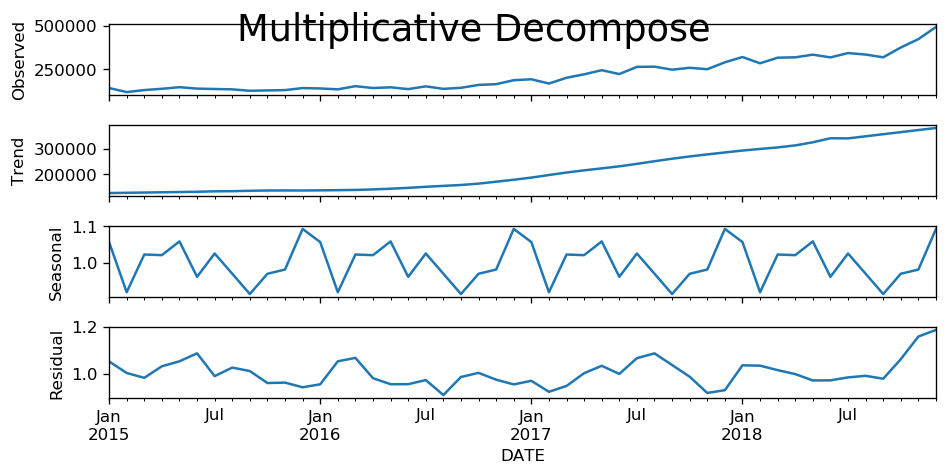

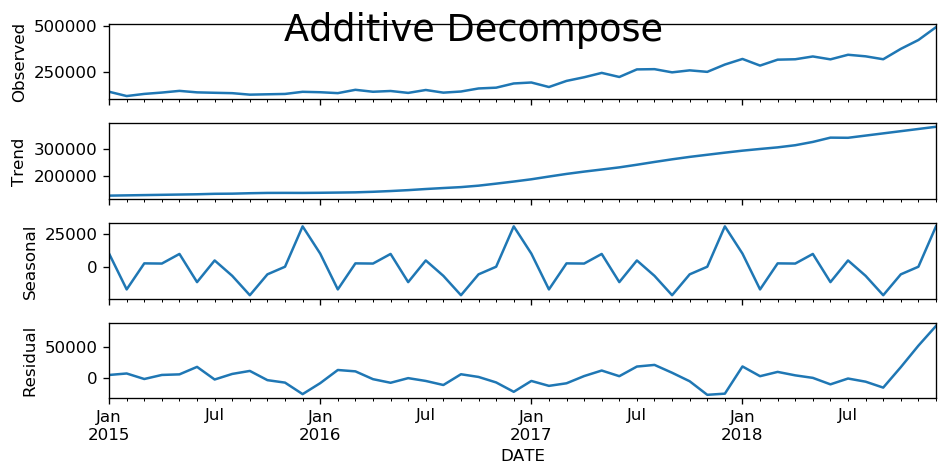

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Multiplicative Decomposition 
result_mul = seasonal_decompose(pp_df.dropna(), model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(pp_df.dropna(), model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (8,4)}) 
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22) 
result_add.plot().suptitle('Additive Decompose', fontsize=22) 
plt.show()

In [67]:
def test_stationarity(timeseries):
    
    rollmean_diff = timeseries.rolling(12).mean()
    rollstd_diff = timeseries.rolling(12).std()

    plt.figure(figsize=(8,4))
    plt.plot(timeseries)
    plt.plot(rollmean_diff)
    plt.plot(rollstd_diff,color='black')
    
    result = adfuller(timeseries['TOTAL_PASSENGERS'].dropna()) 
    print('ADF Statistic: %f' % result[0]) 
    print('p-value: %f' % result[1])

Orinigal Series 

ADF Statistic: 2.053127
p-value: 0.998738


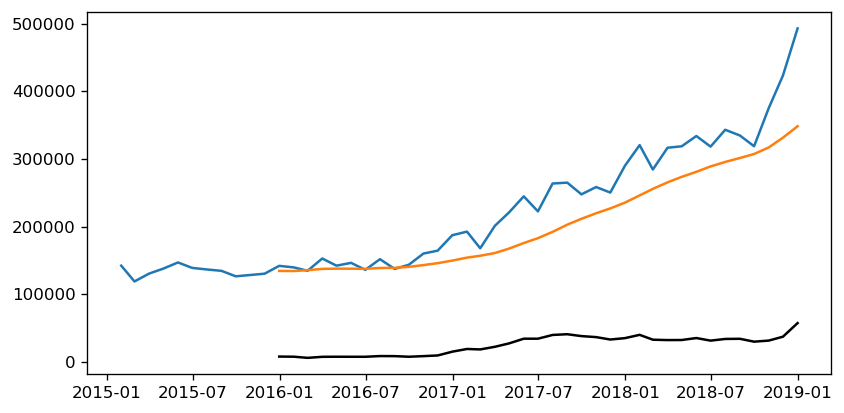

In [68]:
test_stationarity(pp_df)

LOG 

ADF Statistic: 1.080589
p-value: 0.995048


<Figure size 960x480 with 0 Axes>

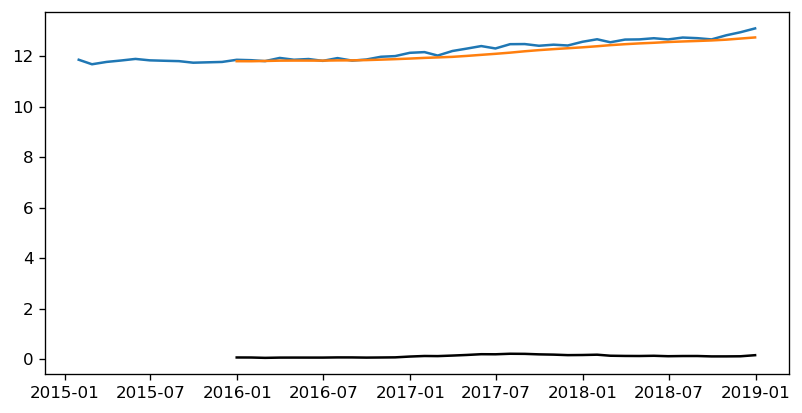

In [69]:
plt.figure(figsize=(8,4))
pp_df_log = np.log(pp_df)
test_stationarity(pp_df_log)

Log Diff 

ADF Statistic: -9.073200
p-value: 0.000000


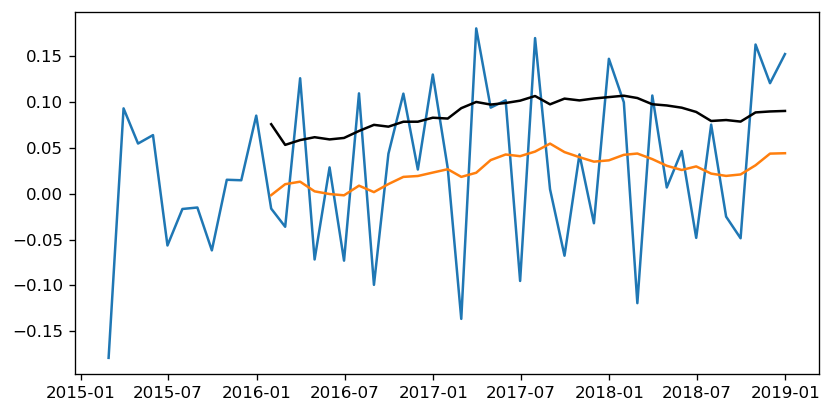

In [70]:
pp_df_log_diff = pp_df_log.diff()
pp_df_log_diff.dropna(inplace=True)

test_stationarity(pp_df_log_diff)

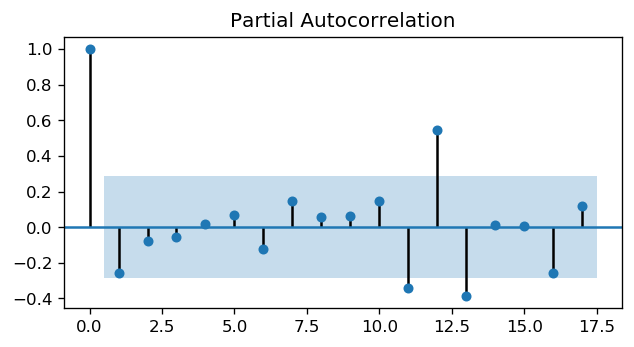

In [71]:
plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':120})
plot_pacf(pp_df_log_diff.dropna())
plt.show()

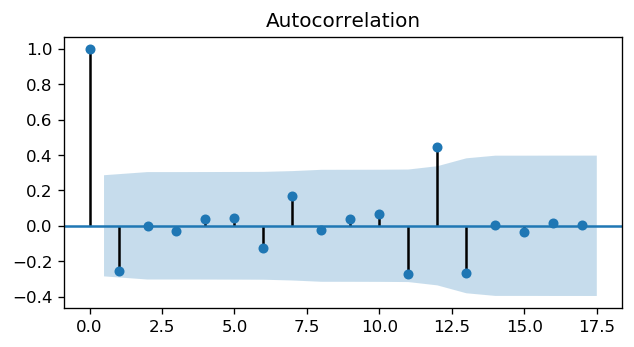

In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize':(6,3), 'figure.dpi':120})
plot_acf(pp_df_log_diff.dropna())

plt.show()

ARIMA 

In [73]:
model = ARIMA(pp_df_log.values, order=(5,1,0)) 

model_fit = model.fit(disp=0) 
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   47
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  49.890
Method:                       css-mle   S.D. of innovations              0.084
Date:                Tue, 14 Jan 2020   AIC                            -85.780
Time:                        14:32:25   BIC                            -72.829
Sample:                             1   HQIC                           -80.906
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0266      0.009      3.101      0.003       0.010       0.043
ar.L1.D.y     -0.3422      0.160     -2.145      0.038      -0.655      -0.030
ar.L2.D.y     -0.1413      0.175     -0.806      0.4

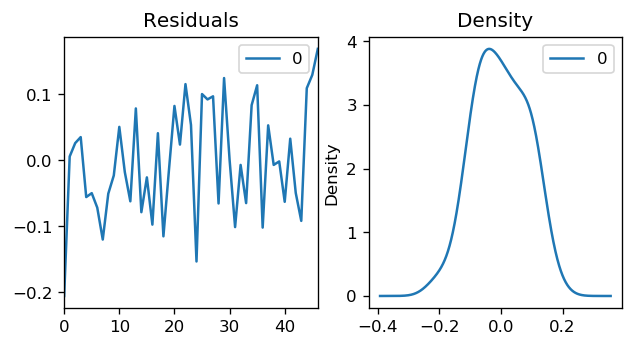

In [74]:
# Plot residual errors 
residuals = pd.DataFrame(model_fit.resid) 
fig, ax = plt.subplots(1,2) 
residuals.plot(title="Residuals", ax=ax[0]) 
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [85]:
np.exp(model_fit.forecast(6)[0])

array([469276.3141947 , 481914.42425038, 502545.75356391, 523955.3785687 ,
       537873.33787358, 547023.41036992])

AUTO 

In [76]:
from pmdarima.arima import auto_arima

In [77]:
auto = auto_arima( pp_df_log.values , start_p=1 , start_q=1 , max_p=8 , max_q=8 ,\
                   start_P=0 , start_Q=0, max_P=9 , max_Q=8 ,
                   m=12 ,\
                   d=1 ,\
                   D=1 , \
                   seasonal=True ,\
                   trace=True , stepwise=True ,\
                   error_action='warn' , suppress_warnings=True , random_state=20 , n_fits=100 , trend='ct')

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=-67.981, BIC=-60.204, Fit time=0.803 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=-70.604, BIC=-65.938, Fit time=0.089 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-82.703, BIC=-74.927, Fit time=0.996 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=-70.604, BIC=-65.938, Fit time=0.089 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=-69.407, BIC=-63.185, Fit time=0.201 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=-86.389, BIC=-77.057, Fit time=2.806 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(3, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, F

In [78]:
auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(0, 1, 2)x(2, 1, 0, 12)   Log Likelihood                  50.253
Date:                            Tue, 14 Jan 2020   AIC                            -86.505
Time:                                    14:32:57   BIC                            -75.618
Sample:                                         0   HQIC                           -82.747
                                             - 48                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0586      0.089      0.657      0.511      -0.116       0.233
drift         -0.0006      0.002     -0.275      0.784      -0.005       0.004
ma.L1         -0.1328      0.207     -0.642      0.521      -0.538       0.273
ma.L2         -0.3052      0.204     -1.495      0.135      -0.705       0.095
ar.S.L12      -1.0976      0.336     -3.269      0.001      -1.756      -0.439
ar.S.L24      -0.5917      0.405     -1.461      0.144      -1.386       0.202
sigma2         0.0020      0.002      1.287      0.198      -0.001       0.005
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.92
Prob(Q):                               nan   Prob(JB):                         0.63
Heteroskedasticity (H):               0.86   Skew:                             0.10
Prob(H) (two-sided):                  0.80   Kurtosis:                         2.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

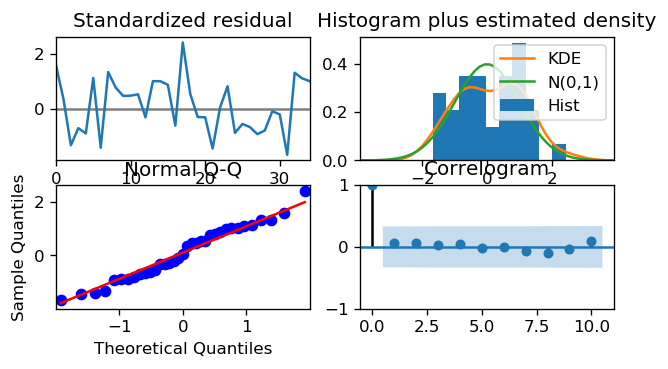

In [81]:
auto.plot_diagnostics()
plt.show()

SARIMA 

In [82]:
import statsmodels.api as sm

In [83]:
model=sm.tsa.statespace.SARIMAX(endog=pp_df_log.values,order=(0,1,0),seasonal_order=(0,1,0,12),trend='n',\
                                enforce_invertibility=False , random_state=20)
results=model.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                   48
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                  37.582
Date:                            Tue, 14 Jan 2020   AIC                            -73.163
Time:                                    14:33:13   BIC                            -71.608
Sample:                                         0   HQIC                           -72.626
                                             - 48                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0068      0.002      3.041      0.002       0.002       0.011
Ljung-Box (Q):                     

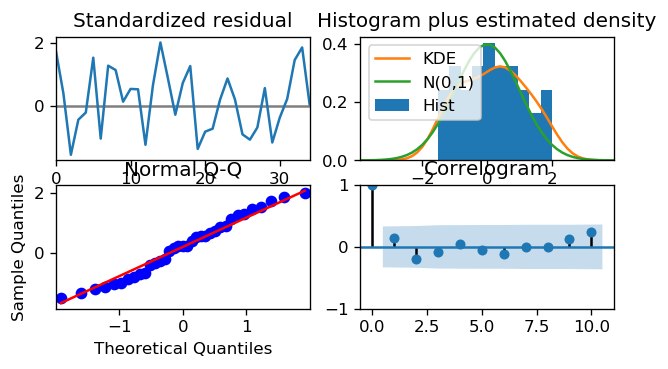

In [84]:
results.plot_diagnostics()
plt.show()

In [87]:
np.exp(results.forecast(6))

array([544879.24465428, 483530.10196419, 538245.1132737 , 541928.4754827 ,
       567788.49977791, 541076.89981739])